In [48]:
from pdf2image import convert_from_path
import numpy as np
import cv2 as cv
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:/Program Files/Tesseract-OCR/tesseract.exe"

In [49]:
# converting pdf to image
pages = convert_from_path(r'docs/patient_details/pd_1.pdf',\
                          poppler_path=r"C:\Users\Amit Vikram Raj\poppler-22.12.0\Library\bin")

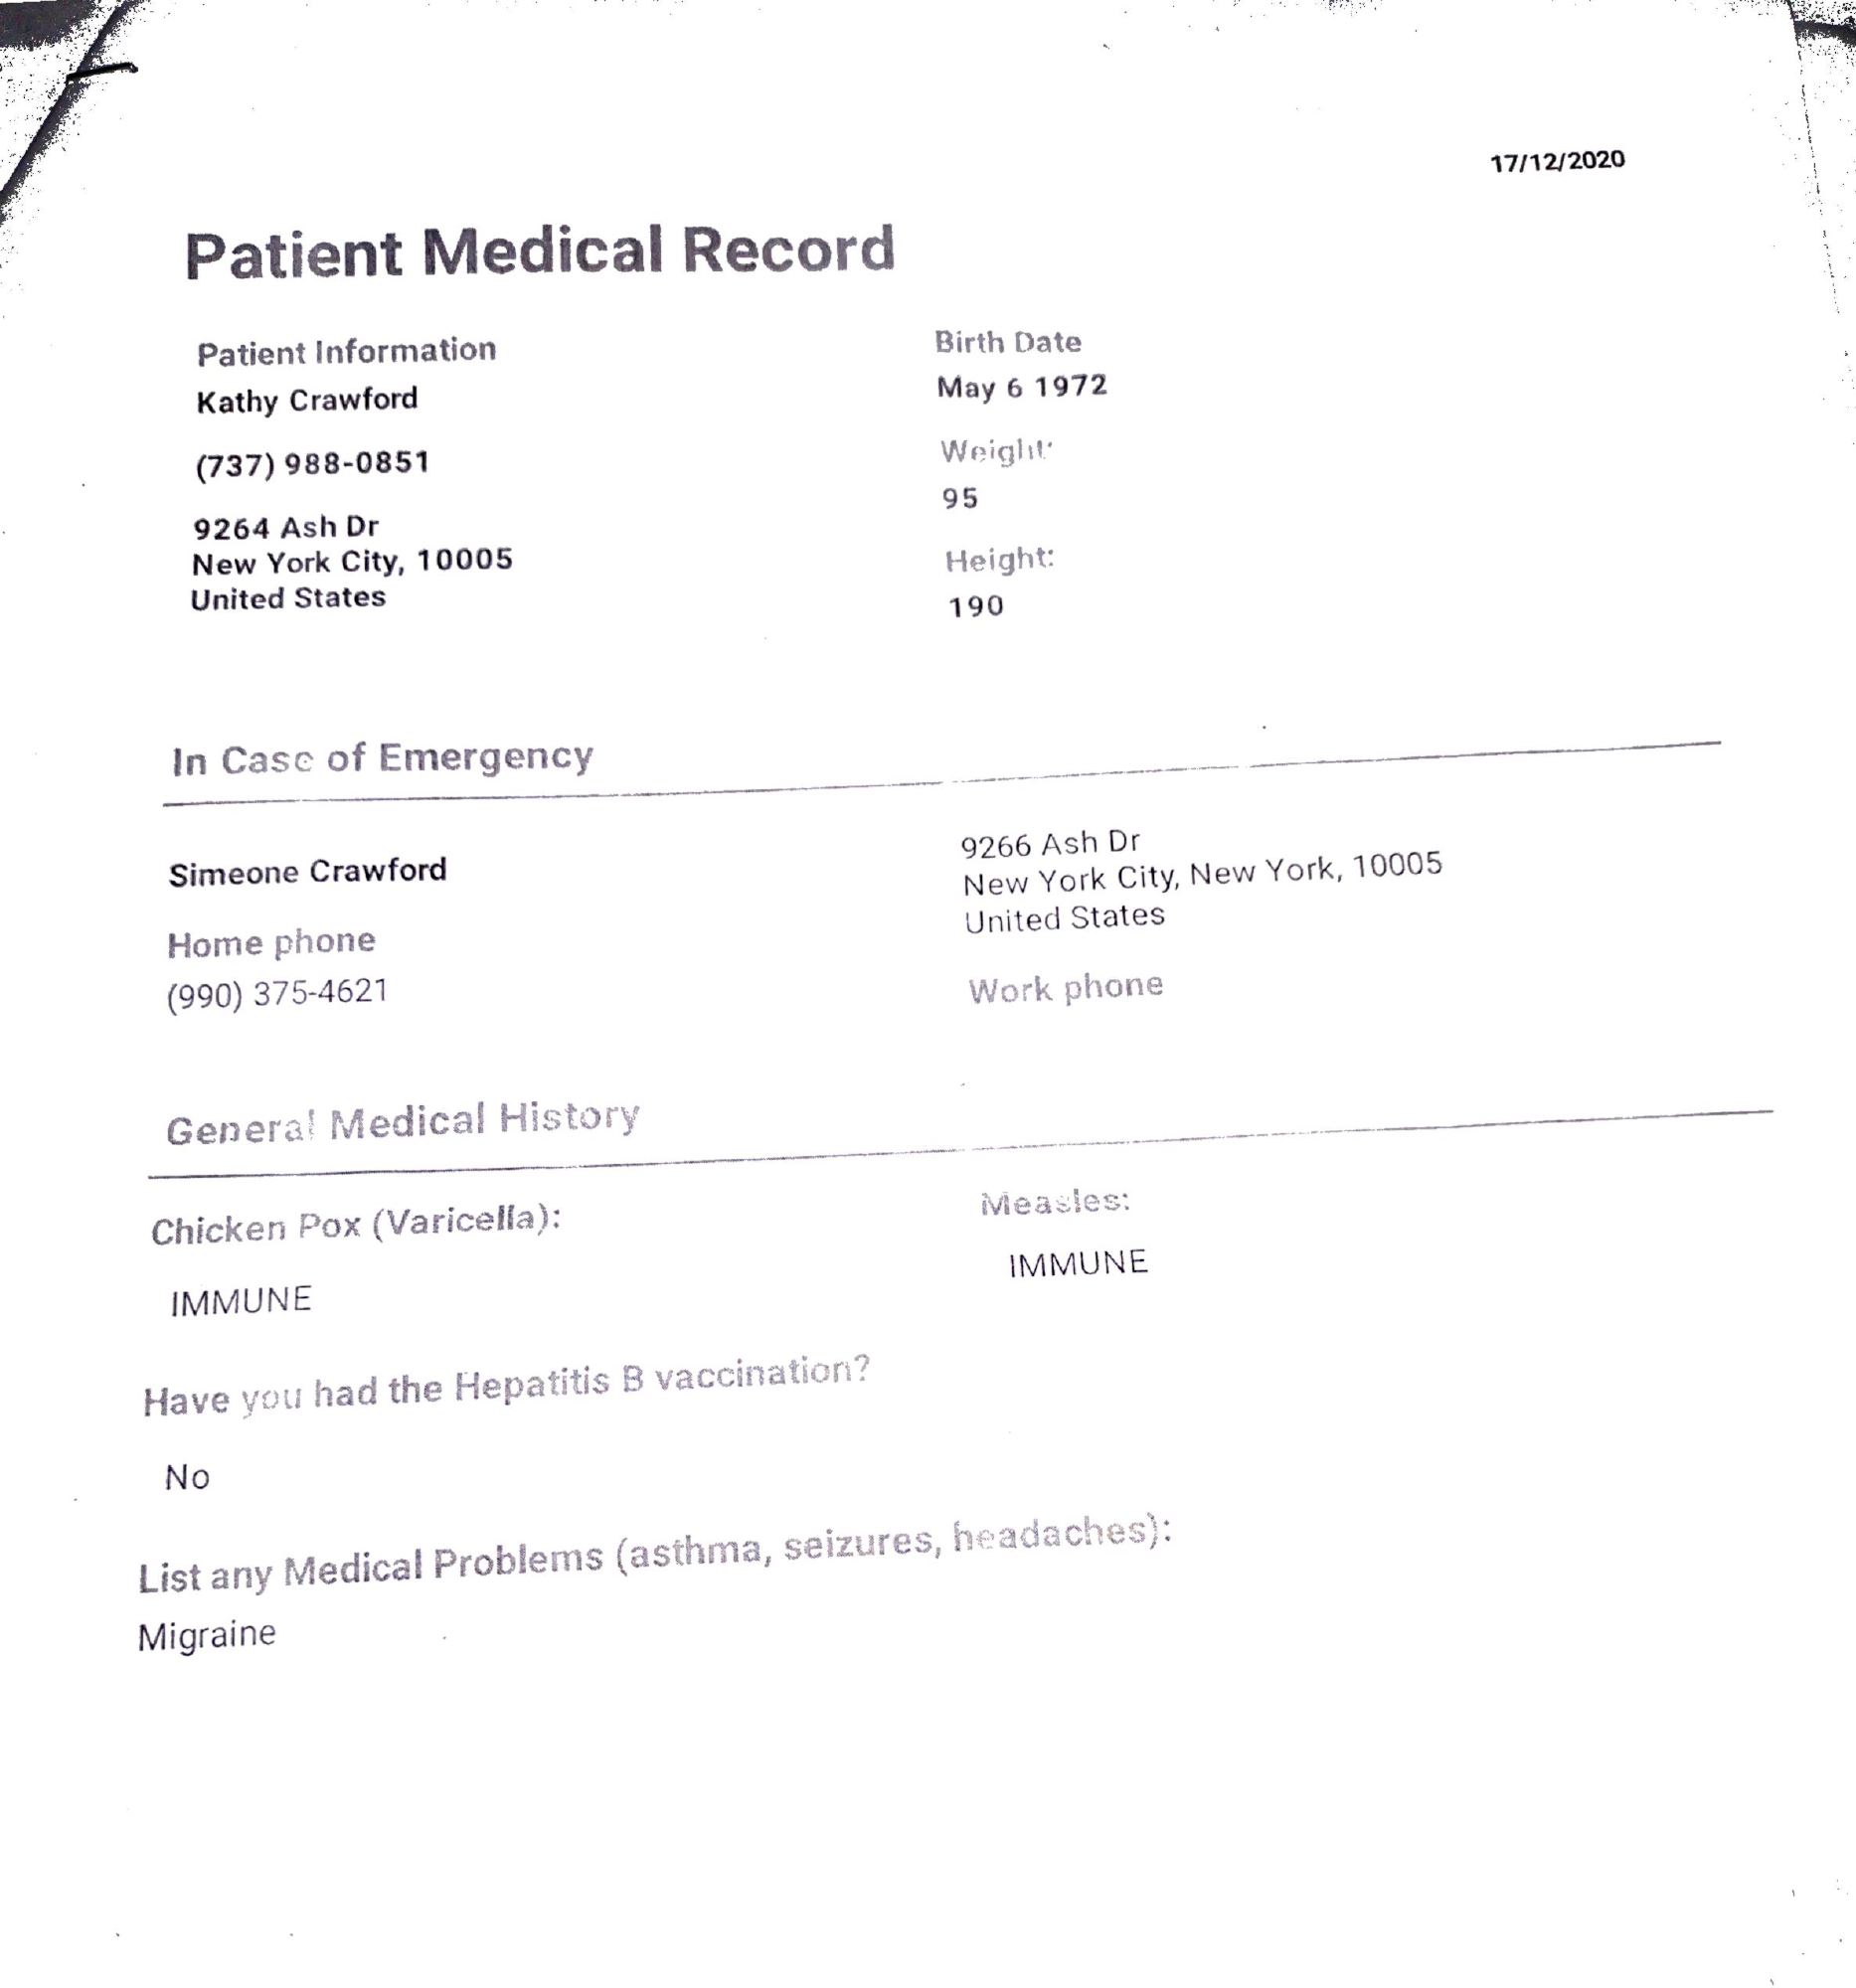

In [50]:
# pages[0].show()
pages[0]

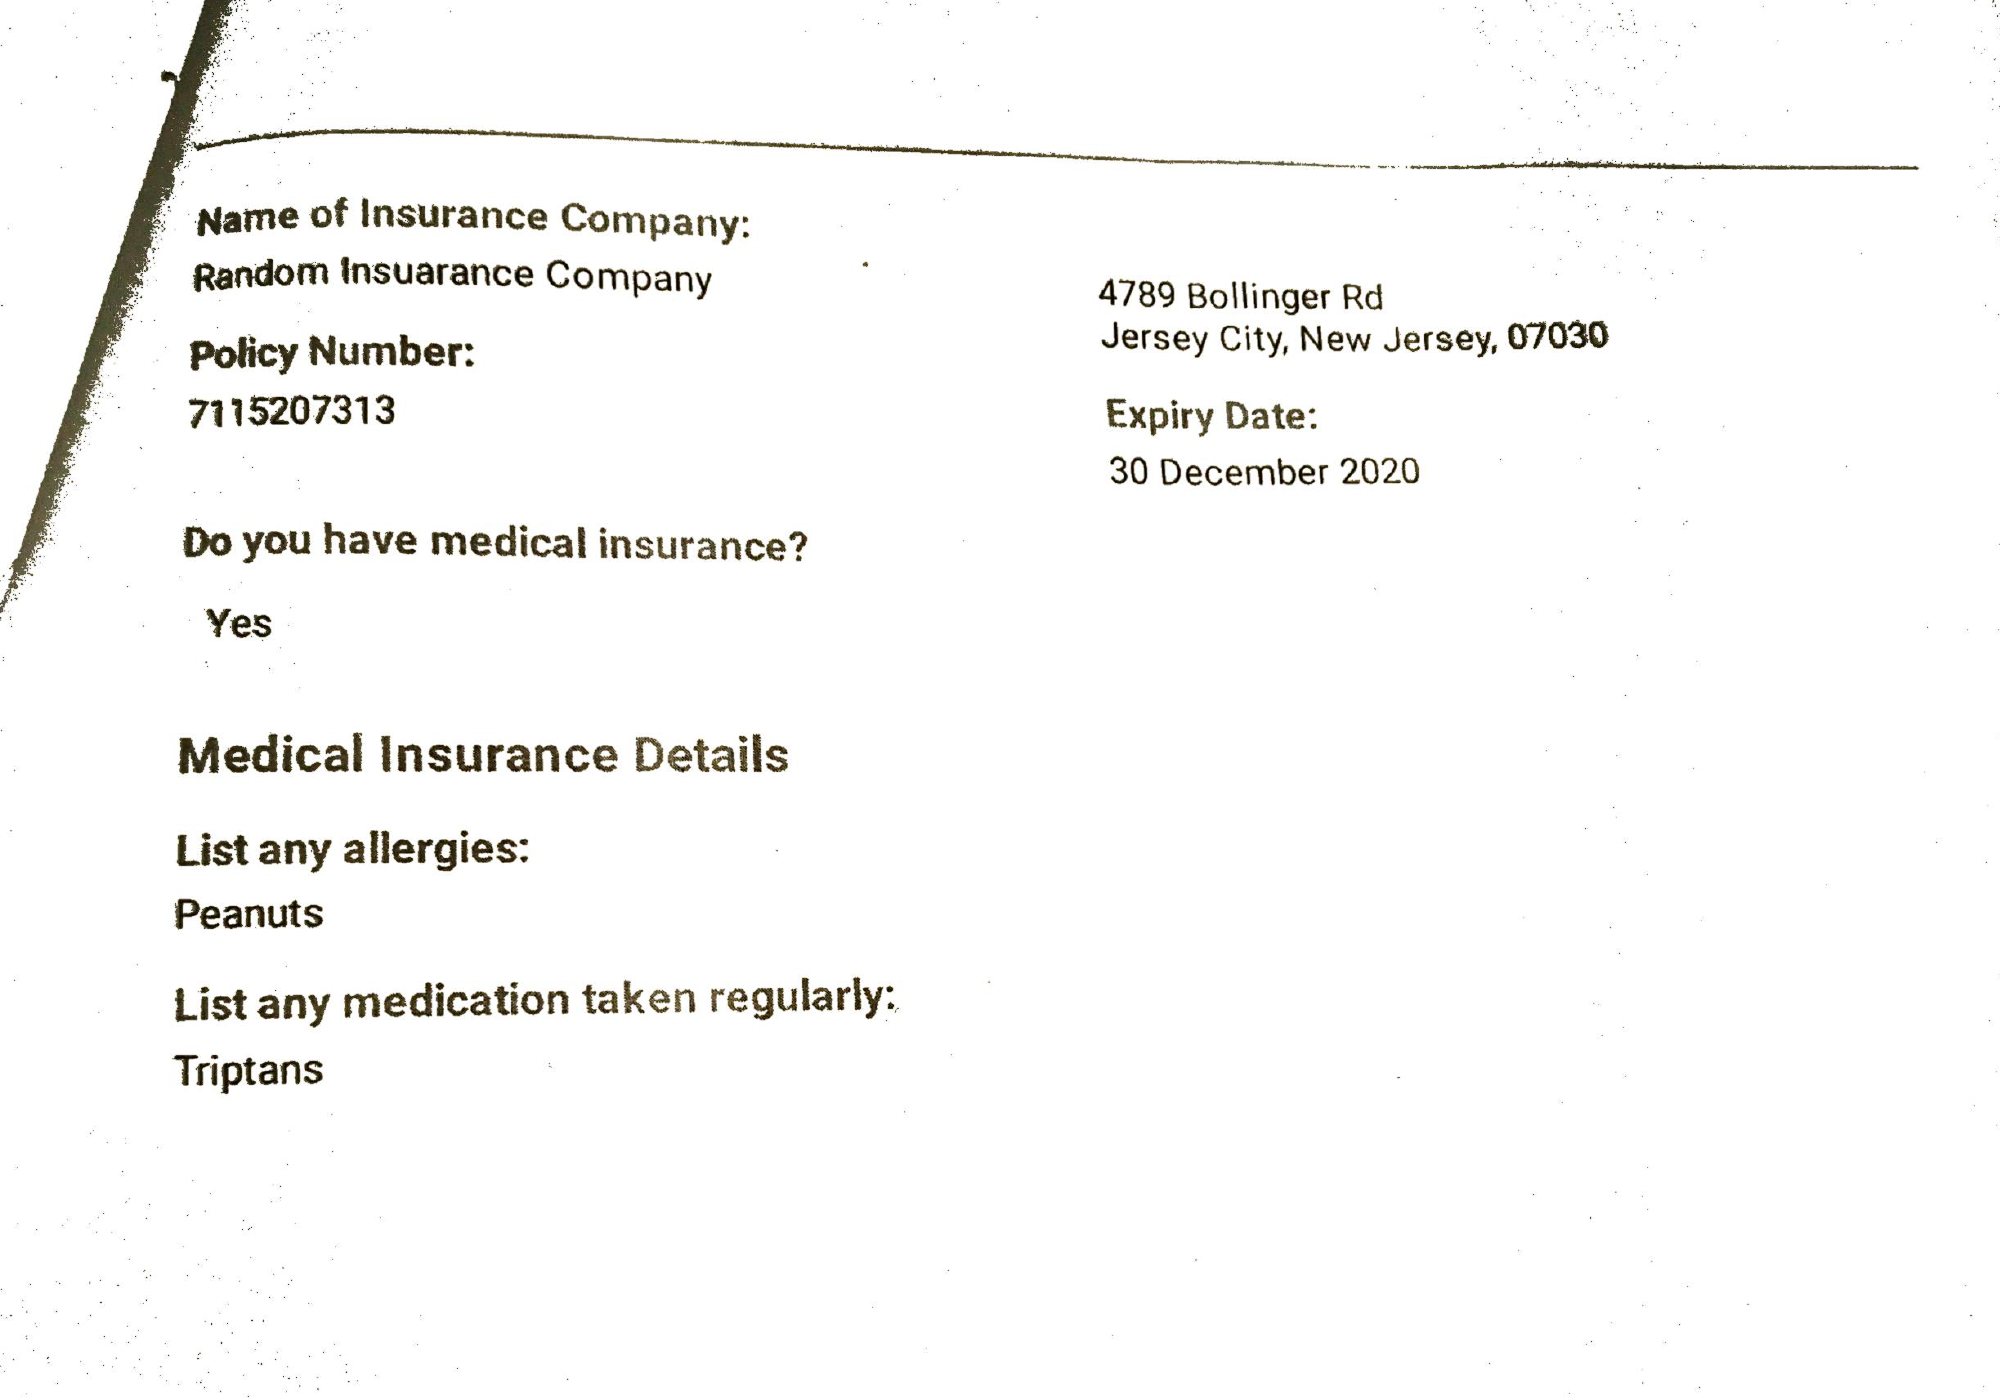

In [51]:
pages[1]

In [52]:
def pre_process_img(img):
    # if color img, convert to gray
    '''
    Why convert to gray?
    
    It enhances easy visualisation. It differentiates between the shadow details and 
    the highlights of an image because it is mainly in 2 spatial dimensions (2D) rather 
    than 3D. Colour complexity is also reduced.
    '''
    gray_img = cv.cvtColor(src=np.array(img), code=cv.COLOR_BGR2GRAY)
    
    # resize the image - making the image bigger for better pixel visibility to get better results
    resized_img = cv.resize(src=gray_img, dsize=None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)
    
    processed_img = cv.adaptiveThreshold(src=resized_img,
                                         maxValue=255,
                                         adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         thresholdType=cv.THRESH_BINARY,
                                         blockSize=61,
                                         C=11)
    return processed_img

In [53]:
# processed_page_1 = pre_process_img(pages[0])
# processed_page_2 = pre_process_img(pages[1])
# Image.fromarray(processed_page_1)
# Image.fromarray(processed_page_2)

processed_pd_1_images = []

for page in pages:
    processed_pd_1_images.append(pre_process_img(page))

In [54]:
text_pd_1 = ''

for img in processed_pd_1_images:
    text = pytesseract.image_to_string(image=img, lang='eng')
    text_pd_1 += ('\n' + text)
    
# text_pd_1 = pytesseract.image_to_string(image=processed_pd_1_images[0], lang='eng')

In [55]:
print(text_pd_1)


17/12/2020

Patient Medical Record

Patient Information Birth Date

Kathy Crawford May 6 1972

(737) 988-0851 Weight’

9264 Ash Dr 95

New York City, 10005 '

United States Height:
190

In Case of Emergency
ee J
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History
nn ee
Chicken Pox (Varicella): Measies:
IMMUNE

IMMUNE
Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches}:

Migraine

.

‘Name of Insurance Company:

Random Insuarance Company - 4789 Bollinger Rd
Jersey City, New Jersey, 07030

a Policy Number:
71 1520731 3 Expiry Date:

. 30 December 2020
Do you have medical insurance?

Yes:

Medical Insurance Details

List any allergies:

Peanuts

List any medication taken regularly:
Triptans



In [56]:
# Using regex to extract:
# Patient Name, Phone Number, Hepatitis B vaccination status, Any Medical problems
import re

In [57]:
# Patient Name

# pattern = "Date\n(.*)[A-Za-z] \d \d{4}"
pattern = "Date[\n]*(.*) [a-zA-Z]+ \d \d{4}"
matches = re.findall(pattern, text_pd_1)
matches
# matches[0].strip()

['Kathy Crawford']

----------------------------------------------------

In [58]:
# Patient Name

# pattern = "Date\n(.*)[A-Za-z] \d \d{4}"
pattern = "Patient Information(.*?)\(\d{3}\)"
matches = re.findall(pattern, text_pd_1, flags=re.DOTALL)
matches
matches[0].strip()

'Birth Date\n\nKathy Crawford May 6 1972'

In [59]:
match = matches[0].strip()
match = match.replace('Birth Date', '').strip()
match

'Kathy Crawford May 6 1972'

In [60]:
pattern ='((Jan|Feb|March|April|May|June|Ju1y|Aug|Sep|Oct|Nov|Dec)[ \d]+)'

date_matches = re.findall(pattern, match)
date = date_matches[0][0]
date

'May 6 1972'

In [61]:
match.replace(date, '').strip()

'Kathy Crawford'

In [62]:
def remove_noise_from_name(name: str):
    name = name.strip()
    name = name.replace('Birth Date', '').strip()
    
    pattern ='((Jan|Feb|March|April|May|June|Ju1y|Aug|Sep|Oct|Nov|Dec)[ \d]+)'

    date_matches = re.findall(pattern, name)
    date = date_matches[0][0]
    
    name = name.replace(date, '').strip()
    return name

In [63]:
pattern = "Patient Information(.*?)\(\d{3}\)"
matches = re.findall(pattern, text_pd_1, flags=re.DOTALL)
matches
matches[0]

' Birth Date\n\nKathy Crawford May 6 1972\n\n'

In [64]:
remove_noise_from_name(matches[0])

'Kathy Crawford'

---------------------------------------------

In [65]:
# Phone Number 

pattern = "\d{4}[\n]*(\(\d{3}\) \d{3}-\d{4})"
matches = re.findall(pattern, text_pd_1)
matches

['(737) 988-0851']

In [66]:
# Phone Number 

pattern = "Patient Information(.*?)(\(\d{3}\) \d{3}-\d{4})"
matches = re.findall(pattern, text_pd_1, flags=re.DOTALL)
matches[0][1]

'(737) 988-0851'

---------------------------------------------------------------------

In [67]:
# Hepatitis B vaccination status

# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+)[\n]*List"
# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+)"
pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+|‘\w+)"
matches = re.findall(pattern, text_pd_1)
matches

['No']

In [68]:
# Hepatitis B vaccination status

# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+)[\n]*List"
# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+)"
pattern = "Have you had the Hepatitis B vaccination\?.*?(Yes|No)"
matches = re.findall(pattern, text_pd_1, flags=re.DOTALL)
matches

['No']

--------------------------------------------------------

In [77]:
# Any Medical problems

# pattern = "List any Medical Problems \(asthma, seizures, headaches\}:[\n]*(.*)|List any Medical Problems \(asthma, seizures, headaches\):[\n]*(.*)"
pattern = "List any Medical Problems .*?:[\n]*(.*)"
matches = re.findall(pattern, text_pd_1)
matches

['Migraine']

In [42]:
# Any Medical problems

pattern = "List any Medical Problems \(asthma, seizures, headaches\}:[\n]*(.*)|List any Medical Problems \(asthma, seizures, headaches\):[\n]*(.*)"
matches = re.findall(pattern, text_pd_1)
matches[0]

('Migraine', '')

-------------------------

In [26]:
# converting pdf to image
pages = convert_from_path(r'docs/patient_details/pd_2.pdf',\
                          poppler_path=r"C:\Users\Amit Vikram Raj\poppler-22.12.0\Library\bin")

In [27]:
processed_pd_2_images = []

for page in pages:
    processed_pd_2_images.append(pre_process_img(page))

In [28]:
text_pd_2 = ''

for img in processed_pd_2_images:
    text = pytesseract.image_to_string(image=img, lang='eng')
    text_pd_2 += ('\n' + text)
    # break

In [29]:
print(text_pd_2)


Patient Medical Record

Patient Information Birth Date

Jerry Lucas May 2 1998

(279) 920-8204 Weight:

4218 Wheeler Ridge Dr 57

Buffalo, New York, 14201 Height:

United States gnt
170

In Case of Emergency

- eee

Joe Lucas . 4218 Wheeler Ridge Dr
Buffalo, New York, 14201
Home phone United States
Work phone

General Medical History

Chicken Pox (Varicelia): Measles: ..

IMMUNE NOT IMMUNE

Have you had the Hepatitis B vaccination?

‘Yes

| List any Medical Problems (asthma, seizures, headaches):
N/A

7?
v

17/12/2020


_—

Name of Insurance Company:
Random Insuarance Company

Policy Number:
5638746258

Do you have medical insurance?

_ Yes

Medical Insurance Details

List any allergies:
N/A

List any medication taken regularly:

N/A

4218 Smeeler Ridge Dr
Buffalo, New York, 14206
United States

Expiry Date:
31 December 2020



In [30]:
# Patient Name

# pattern = "Date\n(.*)[A-Za-z] \d \d{4}"
pattern = "Date[\n]*(.*) [a-zA-Z]+ \d \d{4}"
matches = re.findall(pattern, text_pd_2)
matches
# matches[0].strip()

['Jerry Lucas']

In [31]:
# Phone Number 

pattern = "\d{4}[\n]*(\(\d{3}\) \d{3}-\d{4})"
matches = re.findall(pattern, text_pd_2)
matches

['(279) 920-8204']

In [46]:
# Hepatitis B vaccination status

# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+)[\n]*List"
# pattern = "Have you had the Hepatitis B vaccination\?[\n]*(\w+|‘\w+)"
pattern = "Have you had the Hepatitis B vaccination\?.*?(Yes|No)"
matches = re.findall(pattern, text_pd_2, re.DOTALL)
matches

['Yes']

In [45]:
# Any Medical problems

pattern = "List any Medical Problems \(asthma, seizures, headaches\):[\n]*(.*)"
matches = re.findall(pattern, text_pd_2)
matches

['N/A']

In [34]:
# Any Medical problems

pattern = "List any Medical Problems \(asthma, seizures, headaches\}:[\n]*(.*)|List any Medical Problems \(asthma, seizures, headaches\):[\n]*(.*)"
matches = re.findall(pattern, text_pd_2)
matches[0]

('', 'N/A')

In [79]:
# Any Medical problems

# pattern = "List any Medical Problems \(asthma, seizures, headaches\}:[\n]*(.*)|List any Medical Problems \(asthma, seizures, headaches\):[\n]*(.*)"
pattern = "List any Medical Problems .*?:[\n]*(.*)"
matches = re.findall(pattern, text_pd_2)
matches

['N/A']